In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

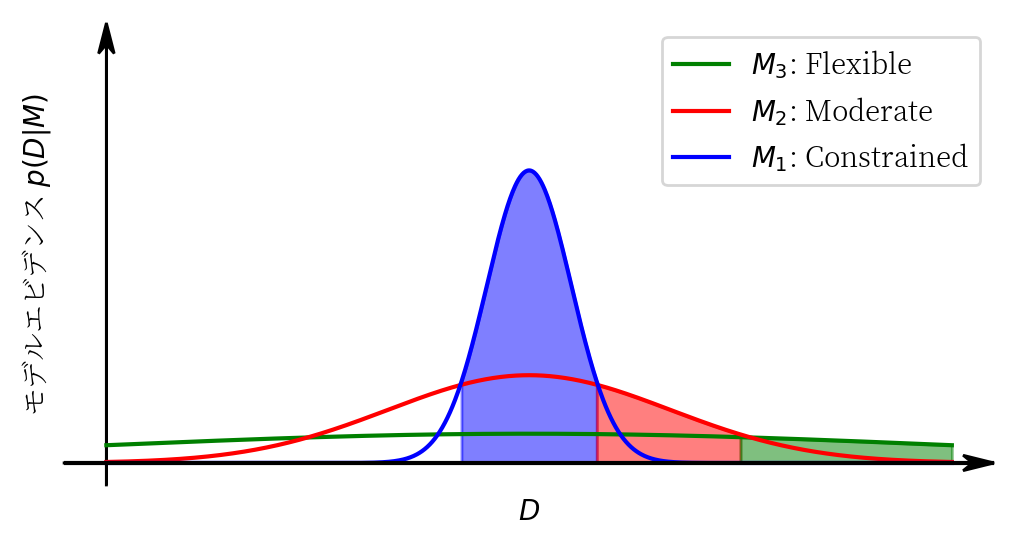

In [77]:
x = np.linspace(0, 6, 1000)


def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./30.*(ymax-ymin) 
    hl = 1./30.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


fig = plt.figure(figsize=(6,3))

plt.plot(x, stats.norm(3, 3).pdf(x), color='green', label='$M_3$: Flexible')
plt.plot(x, stats.norm(3, 1).pdf(x), color='red', label='$M_2$: Moderate')
plt.plot(x, stats.norm(3, 0.3).pdf(x), color='blue', label='$M_1$: Constrained')

x = np.linspace(2.52, 3.48)
plt.fill_between(x, stats.norm(3, 0.3).pdf(x), color='blue', alpha=.5)

x = np.linspace(3.48, 4.5)
plt.fill_between(x, stats.norm(3, 1).pdf(x), color='red', alpha=.5)

x = np.linspace(4.5, 6)
plt.fill_between(x, stats.norm(3, 3).pdf(x), color='green', alpha=.5)

# plt.axvline(2.5, linestyle='--', color='black')
# plt.axvline(3.5, linestyle='--', color='black')
plt.axhline(color='black')

plt.ylabel('モデルエビデンス $p(D|M)$')
plt.ylim(-0.1, 2)
plt.yticks([])

plt.xlabel('$D$')
plt.xticks([])
fig.set_facecolor('white') 
ax = plt.gca()

arrowed_spines(fig, ax)
plt.legend(loc='upper right')
plt.savefig('model_evidence.png', dpi=200)
plt.show()